# 부동산 가격 예측하기

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

## 1. Data

이번 실습에서 사용할 데이터는 california 집 값을 예측하는 데이터입니다.

### 1.1 Data Load

데이터는 `sklearn.datasets`의 `fetch_california_housing`를 통해 사용할 수 있습니다.

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [ ]:
data, target = housing["data"], housing["target"]

### 1.2 Data EDA

In [ ]:
pd.DataFrame(data, columns=housing["feature_names"]).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
pd.Series(target).describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

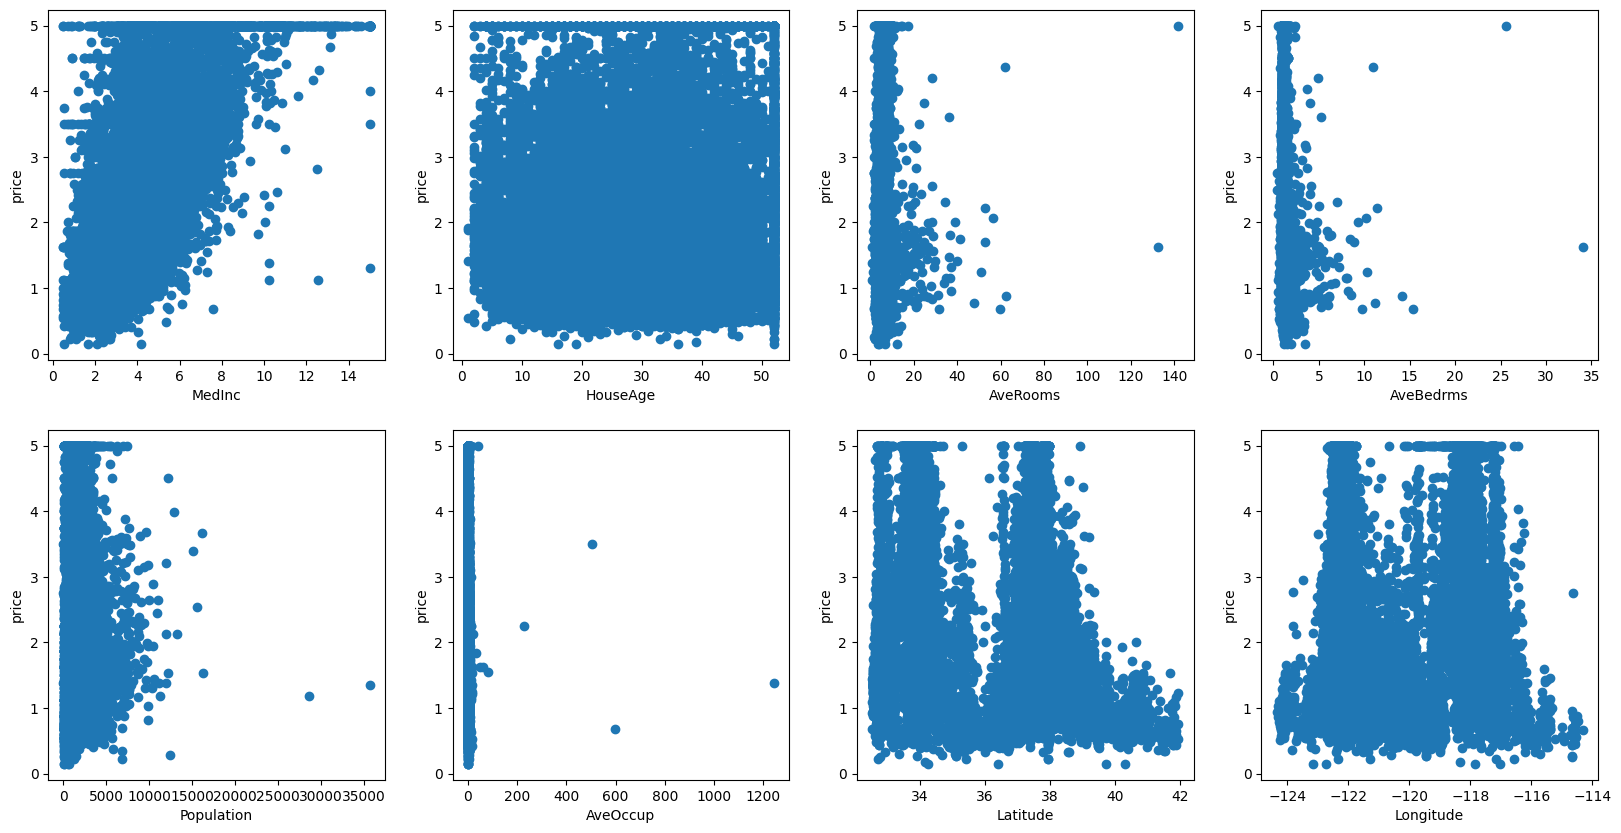

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i, feature_name in enumerate(housing["feature_names"]):
    ax = axes[i // 4, i % 4]
    ax.scatter(data[:, i], target)
    ax.set_xlabel(feature_name)
    ax.set_ylabel("price")
# 위에 있는 변수들로 맞춰야할 정답과의 관계를 봐야함
# medinc가 선형성을 보임, 나머지들은 관계가 잘 안 보임

### 1.3 Data Split

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

## 2. XGBoost

In [ ]:
import xgboost as xgb


xgb_reg = xgb.XGBRegressor()

### 2.1 학습

In [ ]:
xgb_reg.fit(train_data, train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### 2.2 예측

In [ ]:
xgb_train_pred = xgb_reg.predict(train_data)
xgb_test_pred = xgb_reg.predict(test_data)

Text(0, 0.5, 'target')

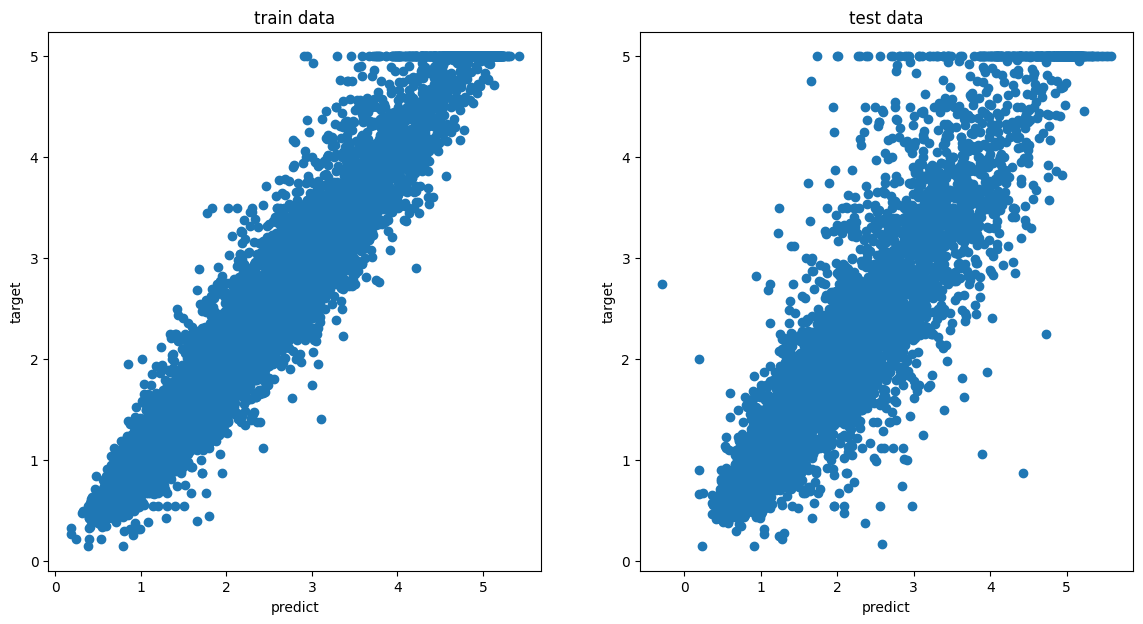

In [ ]:
# 실제값과 예측값의 관계 보기
# 위쪽의 값을 잘 맞추지 못함
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(xgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(xgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 2.3 평가

In [ ]:
from sklearn.metrics import mean_squared_error

xgb_train_mse = mean_squared_error(train_target, xgb_train_pred)
xgb_test_mse = mean_squared_error(test_target, xgb_test_pred)

In [ ]:
print(f"XGBoost Train MSE is {xgb_train_mse:.4f}")
print(f"XGBoost Test MSE is {xgb_test_mse:.4f}")

XGBoost Train MSE is 0.0697
XGBoost Test MSE is 0.2209


## 3. Light GBM

In [ ]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor()

### 3.1 학습

In [ ]:
lgb_reg.fit(train_data, train_target)

LGBMRegressor()

### 3.2 예측

In [ ]:
lgb_train_pred = lgb_reg.predict(train_data)
lgb_test_pred = lgb_reg.predict(test_data)

Text(0, 0.5, 'target')

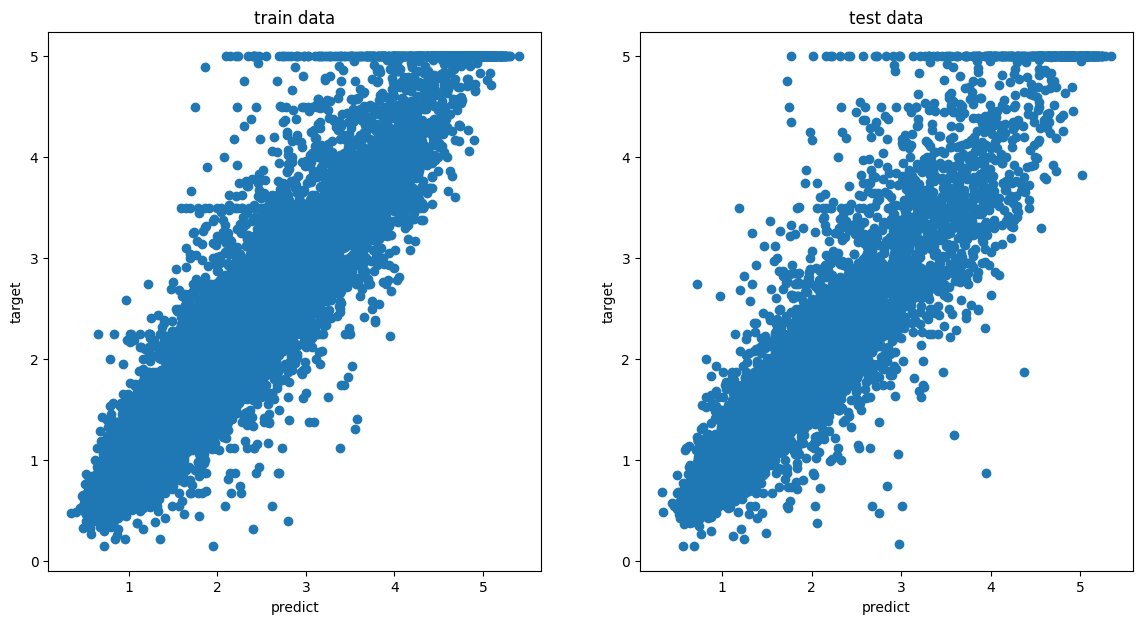

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(lgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(lgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 3.3 평가

In [ ]:
lgb_train_mse = mean_squared_error(train_target, lgb_train_pred)
lgb_test_mse = mean_squared_error(test_target, lgb_test_pred)

In [ ]:
print(f"Light Boost Train MSE is {lgb_train_mse:.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse:.4f}")

Light Boost Train MSE is 0.1543
Light Boost Test MSE is 0.2098


## 4. CatBoost

In [ ]:
import catboost as cb


cb_reg = cb.CatBoostRegressor()

### 4.1 학습

In [ ]:
cb_reg.fit(train_data, train_target, verbose=False) 
# verbose = False 학습되는 과정에 대한 결과물들은 길기때문에 따로 표시하지 않음

### 4.2 예측

In [ ]:
cb_train_pred = cb_reg.predict(train_data)
cb_test_pred = cb_reg.predict(test_data)

Text(0, 0.5, 'target')

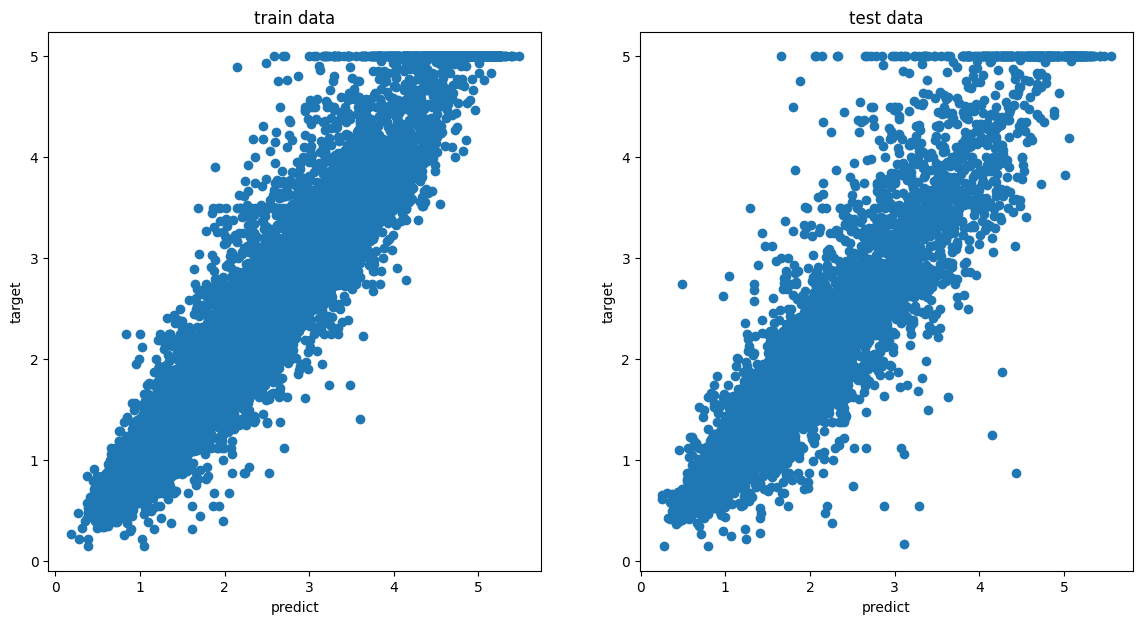

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(cb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(cb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 4.3 평가

In [ ]:
cb_train_mse = mean_squared_error(train_target, cb_train_pred)
cb_test_mse = mean_squared_error(test_target, cb_test_pred)

In [ ]:
print(f"Cat Boost Train MSE is {cb_train_mse:.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse:.4f}")

Cat Boost Train MSE is 0.1163
Cat Boost Test MSE is 0.1938


## 5. 마무리

In [ ]:
# catboost로 갈 수록 예측을 잘함
print(f"XGBoost Test MSE is {xgb_test_mse:.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse:.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse:.4f}")

XGBoost Test MSE is 0.2209
Light Boost Test MSE is 0.2098
Cat Boost Test MSE is 0.1938
